# Montpellier 2 : 2 Le Havre

In [3]:
import sys
sys.path.append('/home/UR/kontaous/Bureau/Stage/')
from Analyses.traitement import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tracking = pd.read_csv("../../Data/HAC/Tracking_data/tracking_Montpellier.csv", low_memory=False)
events = pd.read_csv("../../Data/HAC/match_data/match_Montpellier.csv")
df_home = home_format_metrica(tracking)
df_away = away_format_metrica(tracking)

home_cote_period1 = determine_sides(df_home[df_home['period'] == 1], 1)
away_cote_period1 = determine_sides(df_away[df_away['period'] == 1], 1)

In [4]:
def prepare_data(tracking, events):
    """Prépare et nettoie les données en convertissant les timestamps en format datetime."""
    tracking['datetime'] = pd.to_datetime(tracking['system_time'], unit='ms')
    
    match_date = pd.Timestamp("2023-08-13") # pour chaque match il faut que vous vous assuriez de la ddate du match ;)
    events['timestamp'] = pd.to_datetime(events['timestamp'], format='%H:%M:%S.%f')
    events['datetime'] = match_date + (events['timestamp'] - pd.Timestamp("1900-01-01"))
    
    return tracking, events
tracking, events = prepare_data(tracking, events)

passes = ['datetime', 'team.name', 'period', 'pass.end_location']
df_passes = events[passes].copy()

coordonnees = df_passes['pass.end_location'].apply(decoupage_des_coordonnes)
df_passes.loc[:, 'pass.end_location_x'] = coordonnees.apply(lambda x: x[0] if x is not None else None)
df_passes.loc[:, 'pass.end_location_y'] = coordonnees.apply(lambda x: x[1] if x is not None else None)
df_passes.drop('pass.end_location', axis=1, inplace=True)
df_passes

,datetime,team.name,period,pass.end_location_x,pass.end_location_y
0,2023-08-13 00:00:00.000,Montpellier,1,NaN,NaN
1,2023-08-13 00:00:00.000,Le Havre,1,NaN,NaN
2,2023-08-13 00:00:00.000,Montpellier,1,NaN,NaN
3,2023-08-13 00:00:00.000,Le Havre,1,NaN,NaN
4,2023-08-13 00:00:00.474,Montpellier,1,48.8,42.3
...,...,...,...,...,...
3321,2023-08-13 00:51:58.920,Montpellier,2,NaN,NaN
3322,2023-08-13 00:51:58.920,Montpellier,2,NaN,NaN
3323,2023-08-13 00:52:01.596,Montpellier,2,37.1,70.2
3324,2023-08-13 00:52:04.985,Montpellier,2,NaN,NaN


Equipe a domicile commence à gauche
Equipe visiteuse commence à droite


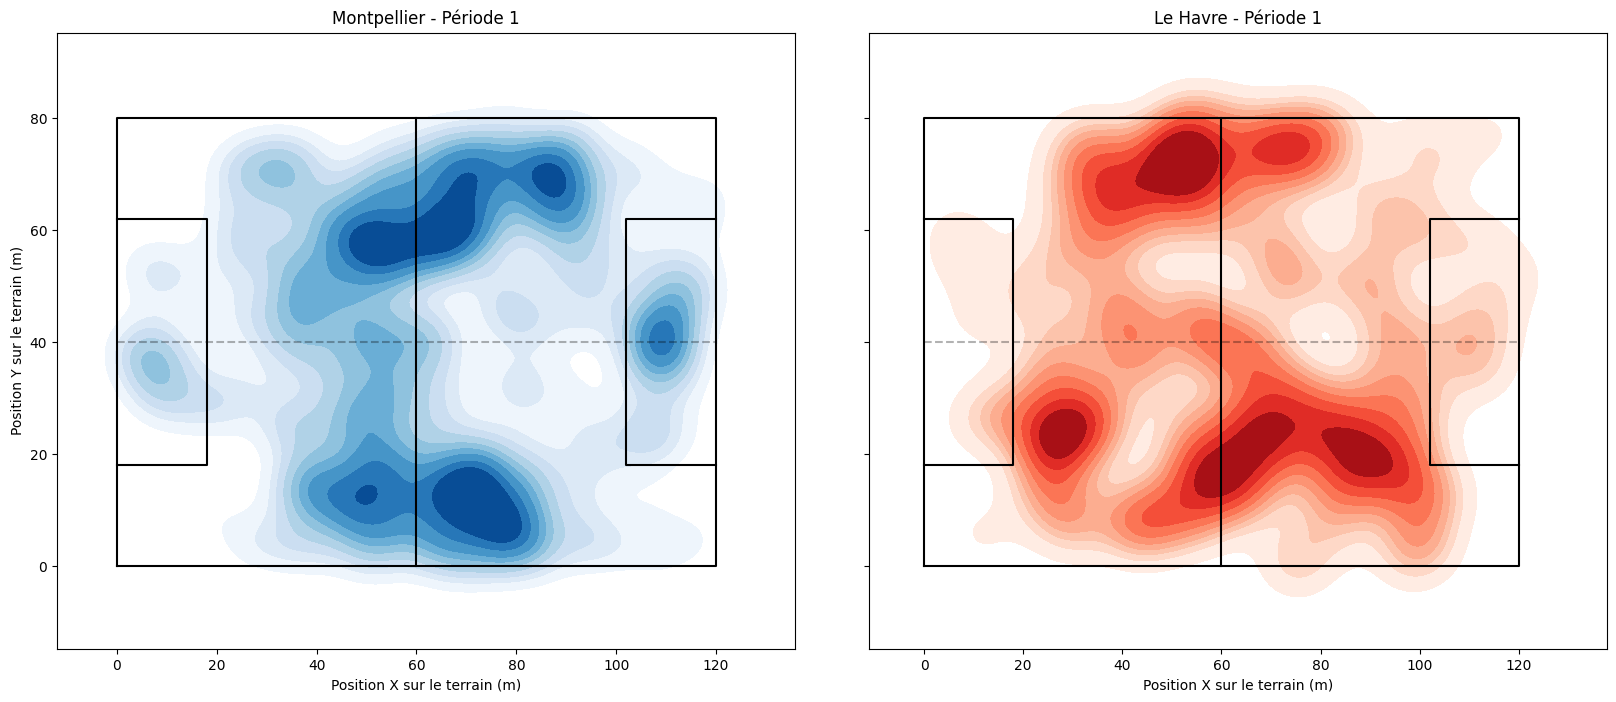

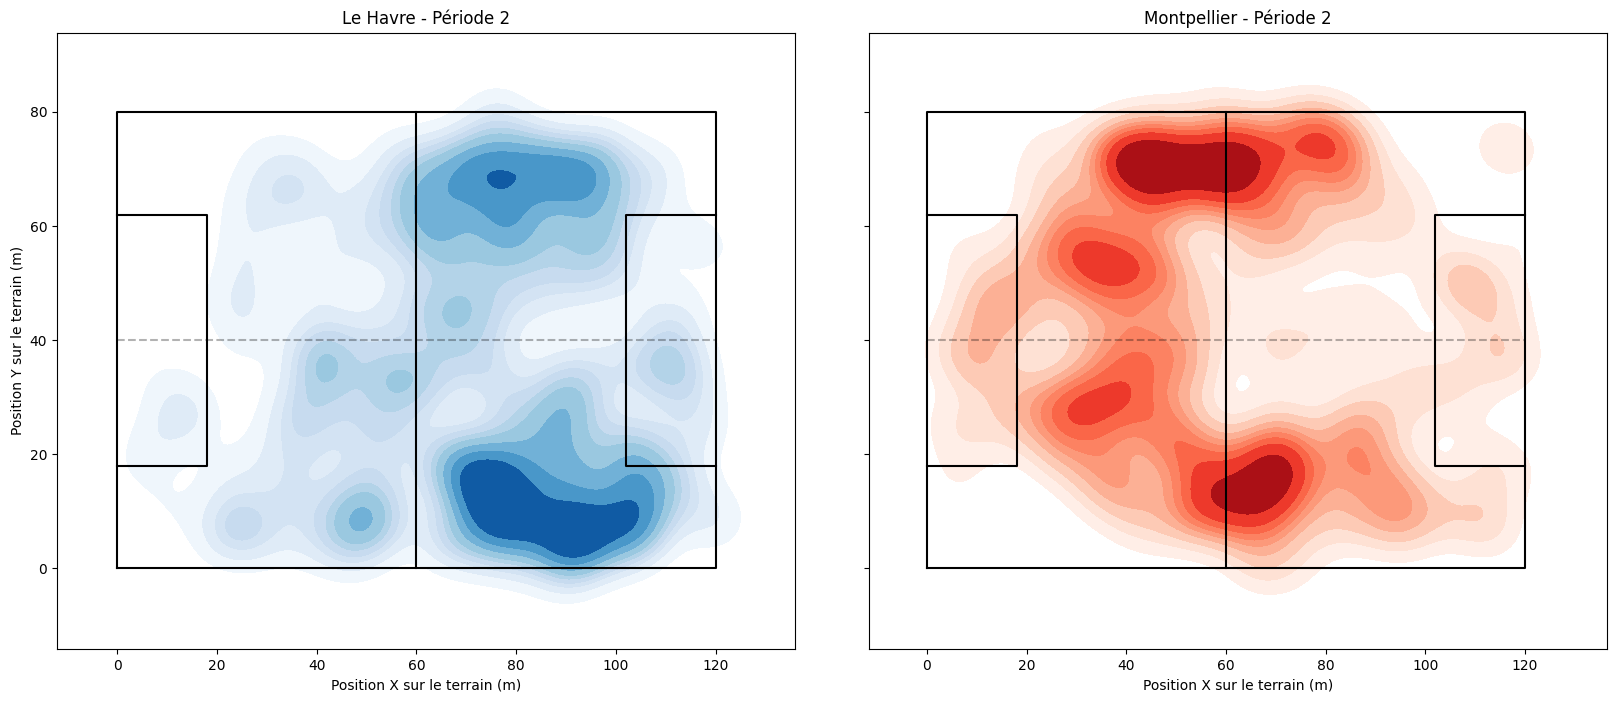

In [5]:
print(f"Equipe a domicile commence à {home_cote_period1}")
print(f"Equipe visiteuse commence à {away_cote_period1}")
def create_heatmap(df, equipe1, equipe2, period):
    equipe_1 = df[(df['team.name'] == equipe1) & (df['period'] == period)].dropna(subset=['pass.end_location_x', 'pass.end_location_y'])
    equipe_2 = df[(df['team.name'] == equipe2) & (df['period'] == period)].dropna(subset=['pass.end_location_x', 'pass.end_location_y'])
    fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    plt.subplots_adjust(wspace=0.1)  
    if not equipe_1.empty:
        sns.kdeplot(x=equipe_1['pass.end_location_x'], y=equipe_1['pass.end_location_y'], cmap="Blues", fill=True, bw_adjust=0.5, ax=axs[0])
        axs[0].set_title(f'{equipe1} - Période {period}')
    if not equipe_2.empty:
        sns.kdeplot(x=equipe_2['pass.end_location_x'], y=equipe_2['pass.end_location_y'], cmap="Reds", fill=True, bw_adjust=0.5, ax=axs[1])
        axs[1].set_title(f'{equipe2} - Période {period}')
    for ax in axs:
        ax.set_xlabel('Position X sur le terrain (m)')
        ax.set_ylabel('Position Y sur le terrain (m)')
        ax.plot([0, 0, 120, 120, 0], [0, 80, 80, 0, 0], color="black")  # Contour du terrain
        ax.plot([60, 60], [0, 80], color="black")  # Ligne médiane
        ax.plot([0, 120], [40, 40], linestyle='--', color="black", alpha=0.3)  # Ligne médiane transversale
        ax.plot([0, 18, 18, 0], [18, 18, 62, 62], color="black")  # Zone de but 1
        ax.plot([120, 102, 102, 120], [18, 18, 62, 62], color="black")  # Zone de but 2

    plt.show()
create_heatmap(df_passes, 'Montpellier', 'Le Havre', 1)
create_heatmap(df_passes, 'Le Havre', 'Montpellier', 2)